In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB



#1.	Find out how many males and females participated in the test. 


In [6]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

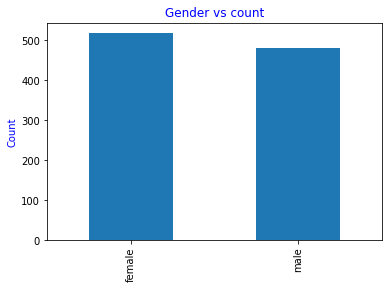

In [113]:
#count of female and men using bar plot
df['gender'].value_counts().plot(kind='bar')
plt.title('Gender vs count',c='b')
plt.ylabel('Count',c='b');

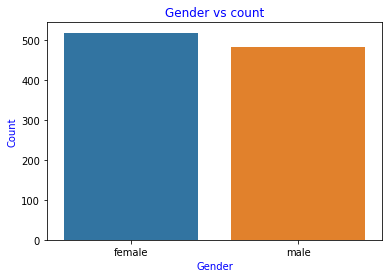

In [116]:
#count of female and men using count plot
sns.countplot(x='gender',data=df)
plt.title('Gender vs count',c='b')
plt.ylabel('Count',c='b')
plt.xlabel('Gender',c='b');

Female count=518,
Male count=482

#2.	What do you think about the students' parental level of education? 

In [7]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [22]:
df.groupby('parental level of education')[['math score',	'reading score',	'writing score']].mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.977477,71.018018,70.031532
bachelor's degree,69.288136,73.000000,73.381356
high school,61.821429,64.602041,62.403061
master's degree,70.254237,75.949153,75.677966
some college,67.128319,69.566372,69.035398
some high school,63.134078,66.759777,64.888268


###From the above table it is clear that students having parents with some degree (associate's degree,bachelor's degree,master's degree) performed better than students with parents having only high school education.

Text(0, 0.5, 'Average')

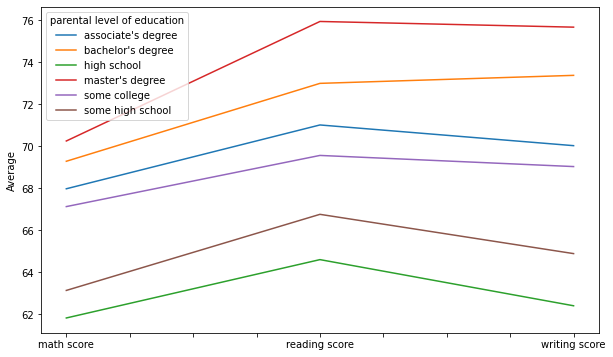

In [30]:
df.groupby('parental level of education')[['math score',	'reading score',	'writing score']].mean().T.plot(figsize=(10,6));
plt.ylabel("Average")

#3.Who scores the most on average for math ,reading, writing based on test preparation score

In [8]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [15]:
df.groupby('test preparation course')[['math score',	'reading score',	'writing score']].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


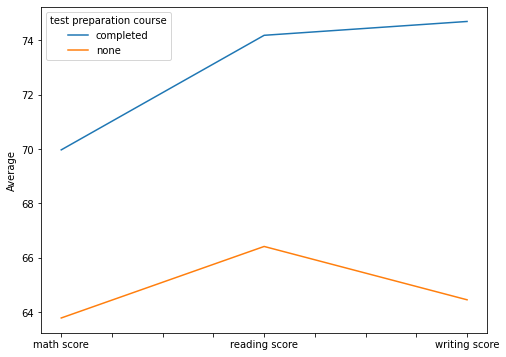

In [117]:
#line graph showing average value of math,reading ,writing score for test preparation course done and not done students...
df.groupby('test preparation course')[['math score',	'reading score',	'writing score']].mean().T.plot(figsize=(8,6))
plt.ylabel("Average");

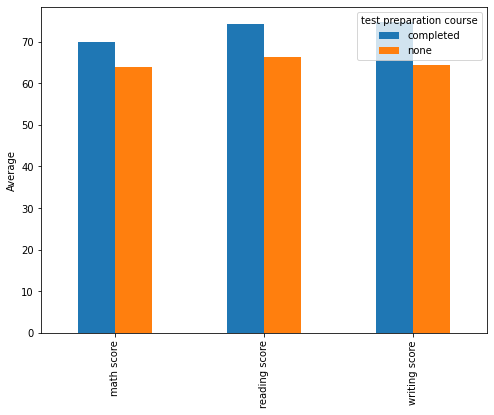

In [118]:
#bar graph showing average value of math,reading ,writing score for test preparation course done and not done students...
df.groupby('test preparation course')[['math score',	'reading score',	'writing score']].mean().T.plot(kind='bar',figsize=(8,6))
plt.ylabel("Average");

###From the above plotted graphs it can conclude that students who have completed test preparation course have better average values in math,reading,writing scores compared to the other  group who has not opted for the test preparation course.

#4.What do you think about scoring variation for math ,reading ,writing based on gender

In [81]:
df[['gender','test preparation course','math score',	'reading score',	'writing score']].groupby(['gender','test preparation course']).mean()

math score  reading score  writing score
gender test preparation course                                          
female completed                 67.108696      77.375000      78.793478
       none                      61.320359      69.955090      68.982036
male   completed                 72.988506      70.793103      70.339080
       none                      66.467532      62.581169      59.551948

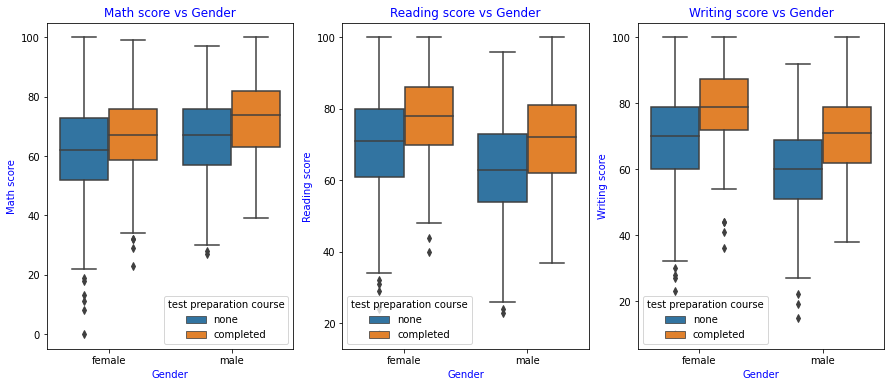

In [79]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(x='gender',y='math score',data=df,hue='test preparation course')
plt.title('Math score vs Gender',c='b')
plt.xlabel('Gender',c='b')
plt.ylabel('Math score',c='b')

plt.subplot(1,3,2)
sns.boxplot(x='gender',y='reading score',data=df,hue='test preparation course')
plt.title('Reading score vs Gender',c='b')
plt.xlabel('Gender',c='b')
plt.ylabel('Reading score',c='b')

plt.subplot(1,3,3)
sns.boxplot(x='gender',y='writing score',data=df,hue='test preparation course')
plt.title('Writing score vs Gender',c='b')
plt.xlabel('Gender',c='b')
plt.ylabel('Writing score',c='b');

###Observation regarding the Scores vs Gender plots:

1.In Math score, Male students have scored more than Female students. And one student that scored zero in Maths is a Female.

2.In Reading score, female students have done better than male students, and the student that scored the lowest mark is a female.

3.For Writing score, females have performed better than males and again the student that scored the lowest in this  is also a female.

4.It is clear that all the students who completed the test preparation course have scored better marks  than those who did not done the course.

5.The students who did not done the test preparation course are the ones who scored zero and the lowest marks.

#5.The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this. 

In [93]:
#nlargest -Sort the DataFrame by the specified columns, descending, and return the specified number of rows
#here top 25% students based on math score,that is 25*1000/100=250 students...
#newdf is the data frame having top 25 % students who scored more in math..
newdf=df.nlargest(int(25*1000/100),'math score')
newdf

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
515,female,group E,some college,standard,none,100,92,97
516,female,group E,bachelor's degree,standard,none,100,100,100
517,female,group E,associate's degree,standard,none,100,100,100
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
...,...,...,...,...,...,...,...,...
428,female,group D,some college,free/reduced,none,77,86,86
429,female,group E,some high school,standard,none,77,79,80
849,male,group A,bachelor's degree,standard,none,77,67,68
850,male,group C,associate's degree,free/reduced,none,77,67,64


In [101]:
#creating a new column named 'bonus point'
newdf['bonus point']='yes'

In [100]:
newdf

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,bonus point
515,female,group E,some college,standard,none,100,92,97,yes
516,female,group E,bachelor's degree,standard,none,100,100,100,yes
517,female,group E,associate's degree,standard,none,100,100,100,yes
996,male,group A,some college,standard,completed,100,96,86,yes
997,male,group D,some college,standard,completed,100,97,99,yes
...,...,...,...,...,...,...,...,...,...
428,female,group D,some college,free/reduced,none,77,86,86,yes
429,female,group E,some high school,standard,none,77,79,80,yes
849,male,group A,bachelor's degree,standard,none,77,67,68,yes
850,male,group C,associate's degree,free/reduced,none,77,67,64,yes
